In [1]:
!pip install py-rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'CS696DS/696ds_project1'
%cd /content/drive/My\Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS696DS/696ds_project1


In [3]:
#Set path of python code modules
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%load_ext autoreload
%autoreload 2

In [4]:
import json
import numpy as np
import torch
import nltk
import json
import rouge
from collections import Counter
from numpy import mean
import pandas as pd
import random
import matplotlib.pyplot as plt
from statistics import stdev
from scipy.stats import spearmanr

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
data = json.load(open("combined_data.json", 'r'))

In [6]:
evaluator = rouge.Rouge(metrics=["rouge-n", "rouge-l"], max_n=2, limit_length=False, apply_avg=True, stemming=True, ensure_compatibility=True)

def stem(x):
    return Counter(evaluator.stem_tokens(evaluator.tokenize_text(x.lower())))


def calc_ds(summ_a, summ_b, summ_comm):
    s_a, s_b, s_c = stem(summ_a), stem(summ_b), stem(summ_comm)
    nr = sum((s_a & s_b).values()) + sum((s_a & s_c).values()) + sum((s_b & s_c).values()) - 2.0 * sum((s_a & s_b & s_c).values())
    dr = sum((s_a | s_b | s_c).values())
    return 1.0 - (nr / dr)

# Distinct Score Comparison With Paraphrases

In [ ]:
ds_gen_orig = []
ds_gen_para = []
ds_refs_orig = []
ds_refs_para = []

for example_no,example in enumerate(data):
  print(example_no)
  if example['split'] != 'train':
    gen_a = example['gen_a']
    gen_b = example['gen_b']
    gen_comm = example['gen_comm']

    ds_gen_orig.append(calc_ds(gen_a, gen_b, gen_comm))

    para_gen_a = example['para_gen_a']
    para_gen_b = example['para_gen_b']
    para_gen_comm = example['para_gen_comm']

    ds_gen_para.append(calc_ds(para_gen_a, para_gen_b, para_gen_comm))

  refs_a = example['refs_a']
  refs_b = example['refs_b']
  refs_comm = example['refs_comm']

  ds_refs_orig.append(mean(
        [
            calc_ds(refs_a[idx], refs_b[idx], refs_comm[idx]) for idx in range(len(refs_a))
        ]
    )   
  )

  para_refs_a = example['para_refs_a']
  para_refs_b = example['para_refs_b']
  para_refs_comm = example['para_refs_comm']

  ds_refs_para.append(mean(
        [
            calc_ds(para_refs_a[idx], para_refs_b[idx], para_refs_comm[idx]) for idx in range(len(refs_a))
        ]
    )   
  )


### Generated vs Paraphrase

In [8]:
def compare_ds(x, y, desc):
  print()
  print(desc.upper())
  # x = ds_gen_orig
  # y = ds_gen_para

  plt.scatter(x, y)
  plt.show()

  r = np.corrcoef(x,y)
  

  rankcorr = spearmanr(x,y)
  

  diffs = [x[i] - y[i] for i in range(len(x))]
  mean = np.mean(diffs)
  std_dev = stdev(diffs)

  print(f"rank correlation = {rankcorr}", '\n')
  print(f"correlation = {r[0,1]}", '\n')
  print(f"mean = {mean} | std_dev = {std_dev}", '\n')


GENERATED VS PARAPHRASE


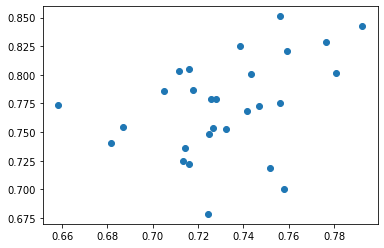

rank correlation = SignificanceResult(statistic=0.3513957307060755, pvalue=0.06671173140041392) 

correlation = 0.37618669779139724 

mean = -0.04092163600061717 | std_dev = 0.042007542697766555 


REFERENCE VS PARAPHRASE


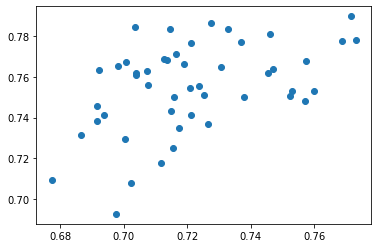

rank correlation = SignificanceResult(statistic=0.41380807642205814, pvalue=0.0034593070044711296) 

correlation = 0.4567461213284826 

mean = -0.03338687845895444 | std_dev = 0.023831428242538175 



In [9]:
## Generated vs Paraphrase
compare_ds(ds_gen_orig, ds_gen_para, 'generated vs paraphrase')

## Reference vs Paraphrase
compare_ds(ds_refs_orig, ds_refs_para, 'reference vs paraphrase')

In [14]:
!git restore anno.json
!git add DS_Analysis.ipynb
!git status
!git add combined_data.json
!git status


On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   DS_Analysis.ipynb
	modified:   combined_data.json

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   anno.json

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   DS_Analysis.ipynb
	modified:   combined_data.json

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   anno.json

